In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### Handle Missing values

In [2]:
initData = pd.read_csv('stroke_data.csv')
initData = initData[initData["sex"].notna()]

In [3]:

X = initData.iloc[:, 0:10].values
y = initData.iloc[:, 10].values

#### Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [5]:
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Random Forest Classifier

In [6]:
depth = [i for i in range(1,20)]
depth_accuracy = []

for depth_val in depth:
    RandomForest = RandomForestClassifier(n_estimators = 100, max_depth=depth_val, n_jobs=-1)
    RandomForest.fit(X_train, y_train)
    Predicted_values = RandomForest.predict(X=X_test)
    depth_accuracy.append(accuracy_score(y_test, Predicted_values)*100)

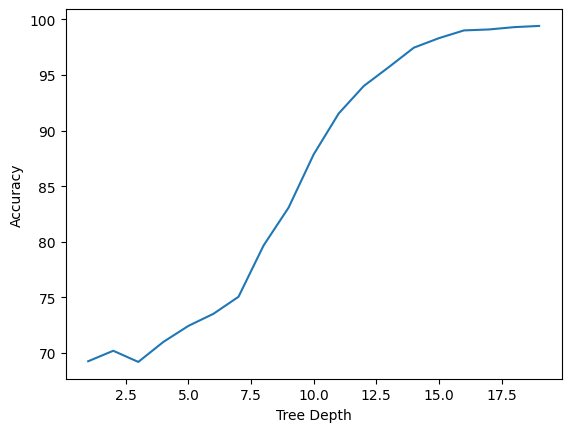

In [7]:
plt.plot(depth,depth_accuracy)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()

In [8]:
estimators = [i for i in range(1,200)]
accuracy_estimators = []

for tree_num in estimators:
    RandomForest = RandomForestClassifier(n_estimators = tree_num, max_depth=15, n_jobs=-1)
    RandomForest.fit(X_train, y_train)
    Predicted_values = RandomForest.predict(X=X_test)
    accuracy_estimators.append(accuracy_score(y_test, Predicted_values)*100)

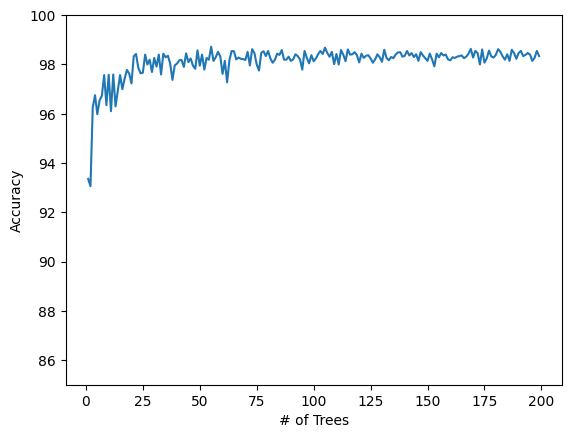

In [9]:
plt.plot(estimators,accuracy_estimators)
plt.xlabel("# of Trees")
plt.ylim((85,100))
plt.ylabel("Accuracy")
plt.show()

In [10]:
depth = [i for i in range(10,20)]
estimators = [i for i in range(100,201)]
accuracy = [[],[],[]]

for trees in estimators:
    for depth_val in depth:
        RandomForest = RandomForestClassifier(n_estimators = trees, max_depth=depth_val, n_jobs=-1)
        RandomForest.fit(X_train, y_train)
        Predicted_values = RandomForest.predict(X=X_test)
        accuracy[0].append(depth_val)
        accuracy[1].append(trees)
        accuracy[2].append(accuracy_score(y_test, Predicted_values)*100)
        

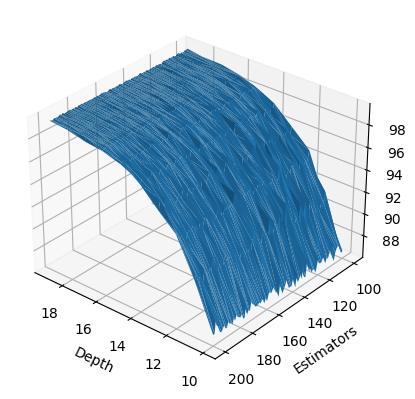

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(accuracy[0],accuracy[1],accuracy[2], edgecolor='none')
ax.set_xlabel("Depth")
ax.set_ylabel("Estimators")
ax.set_zlabel("Accuracy")
ax.view_init(30, 130)
plt.show()

#### Final Score after parameter tuning 

In [12]:
max_accuracy = max(accuracy[2])
max_accuracy_index = accuracy[2].index(max_accuracy)

print(f'When Depth = {accuracy[0][max_accuracy_index]} and # of trees = {accuracy[1][max_accuracy_index]}, Random forest provides the maximum accuracy')

When Depth = 18 and # of trees = 124, Random forest provides the maximum accuracy


In [20]:
RandomForest = RandomForestClassifier(n_estimators = 124, max_depth=18, n_jobs=-1)
RandomForest.fit(X_train, y_train)
Predicted_values = RandomForest.predict(X=X_test)

print("Confusion Matrix:")
for i in confusion_matrix(y_test, Predicted_values):
    print(i)
print("\nAccuracy of Decision tree: " , accuracy_score(y_test, Predicted_values)*100)
print("\nReortSummery:")
print(classification_report(y_test, Predicted_values))

Confusion Matrix:
[4067   50]
[   0 4065]

Accuracy of Decision tree:  99.38890246883403

ReortSummery:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4117
           1       0.99      1.00      0.99      4065

    accuracy                           0.99      8182
   macro avg       0.99      0.99      0.99      8182
weighted avg       0.99      0.99      0.99      8182

